# Visualization (India)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/My Drive/GEE/District91_TempAnalysis_1980_20.csv')

In [4]:
df.head()

,DIST91_ID,NAME,STATE_UT,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,444.0,DADRA_&_NAGAR_HAVELI,DADRA_&_NAGAR_HAVELI,1980-01-01T00:00:00,303.363086,287.336563
1,446.0,DIU,DAMAN_&_DIU,1980-01-01T00:00:00,300.782562,290.148163
2,445.0,DAMAN,DAMAN_&_DIU,1980-01-01T00:00:00,299.633728,292.205414
3,447.0,DELHI,DELHI,1980-01-01T00:00:00,298.071065,274.780852
4,443.0,CHANDIGARH,CHANDIGARH,1980-01-01T00:00:00,296.485575,275.245342


In [5]:
df.describe()

,DIST91_ID,maximum_2m_air_temperature,minimum_2m_air_temperature
count,313920.000000,313920.000000,313920.000000
mean,279.963303,305.312709,290.649739
std,406.661273,6.727516,8.663246
min,0.000000,256.680261,230.993570
25%,140.000000,302.146497,285.876636
50%,268.500000,305.421529,293.336576
75%,424.000000,308.903133,297.289406
max,9999.000000,323.298468,302.341193


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313920 entries, 0 to 313919
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DIST91_ID                   313920 non-null  float64
 1   NAME                        313920 non-null  object 
 2   STATE_UT                    313920 non-null  object 
 3   date                        313920 non-null  object 
 4   maximum_2m_air_temperature  313920 non-null  float64
 5   minimum_2m_air_temperature  313920 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.4+ MB


In [7]:
!pip install geopandas

In [8]:
!pip install descartes

In [9]:
import geopandas as gpd

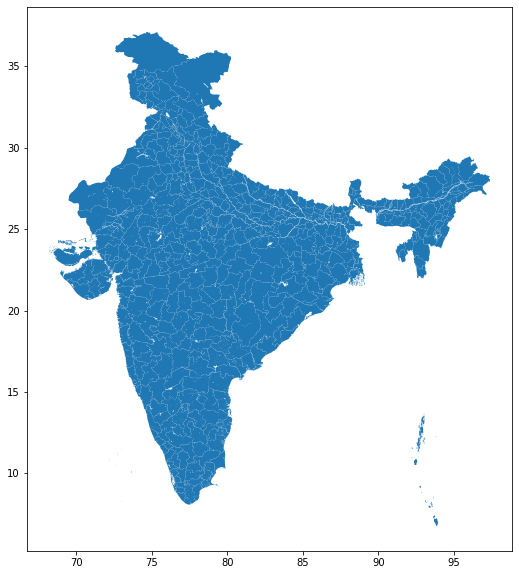

In [10]:
# plotting map of India
path = r'/content/drive/My Drive/GEE/1991_shapefile/91v.shp'
map_India = gpd.read_file(path)
map_India.plot(figsize=(15, 10))
plt.show()

In [11]:
all_districts = df.groupby('NAME').mean()
all_districts.head()

,DIST91_ID,maximum_2m_air_temperature,minimum_2m_air_temperature
NAME,,,
ADILABAD,19.0,309.127730,292.214277
AGRA,380.0,308.695673,289.329998
AHMADNAGAR,236.0,307.644744,290.298326
AHMEDABAD,113.0,310.366161,292.457588
AIZAWL,271.0,303.675486,288.137167


In [12]:
merged_India = map_India.merge(all_districts, left_on = 'NAME', right_index = True)
merged_India.head()

,DIST91_ID_x,NAME,STATE_UT,TOT_AREA,R_AREA,U_AREA,P_R_AREA,P_U_AREA,TOT_HOUSE,R_NM_HOUSE,U_NM_HOUSE,P_R_HOUSE,P_U_HOUSE,T_NM_HH,R_NM_HH,U_NM_HH,P_R_NM_HH,P_U_NM_HH,TOT_POP,R_POP,R_M_POP,R_F_POP,U_POP,U_M_POP,U_F_POP,P_R_POP,P_R_M_POP,P_R_F_POP,P_U_POP,P_U_M_POP,P_U_F_POP,TOT_POP_L6,R_POP_L6,R_M_L6,R_F_L6,U_POP_L6,U_M_L6,U_F_L6,P_TOT_L6,P_R_L6,...,P_TOT_MNW,P_R_MNW,P_R_M_MNW,P_R_F_MNW,P_U_MNW,P_U_M_MNW,P_U_F_MNW,TOT_MRW,R_MRW,R_M_MRW,R_F_MRW,U_MRW,U_M_MRW,U_F_MRW,P_TOT_MRW,P_R_MRW,P_R_M_MRW,P_R_F_MRW,P_U_MRW,P_U_M_MRW,P_U_F_MRW,TOT_NNW,R_NNW,R_M_NNW,R_F_NNW,U_NNW,U_M_NNW,U_F_NNW,P_TOT_NNW,P_R_NNW,P_R_M_NNW,P_R_F_NNW,P_U_NNW,P_U_M_NNW,P_U_F_NNW,ISID,geometry,DIST91_ID_y,maximum_2m_air_temperature,minimum_2m_air_temperature
0,9999.0,DATA NOT AVAILABLE,JAMMU_&_KASHMIR,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DATA NOT AVAILABLE:JAMMU_&_KASHMIR,"POLYGON ((77.55405 35.46635, 77.53082 35.44308...",9999.0,277.790528,255.263907
1,453.0,LADAKH,JAMMU_&_KASHMIR,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LADAKH:JAMMU_&_KASHMIR,"POLYGON ((78.42693 32.50159, 78.42571 32.50443...",453.0,274.044933,248.496271
2,454.0,KARGIL,JAMMU_&_KASHMIR,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KARGIL:JAMMU_&_KASHMIR,"POLYGON ((77.27370 32.85383, 77.26982 32.85754...",454.0,276.136074,252.776707
3,465.0,BARAMULA,JAMMU_&_KASHMIR,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BARAMULA:JAMMU_&_KASHMIR,"MULTIPOLYGON (((74.72009 34.10225, 74.71977 34...",465.0,288.386440,267.444738
4,466.0,KUPWARA,JAMMU_&_KASHMIR,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KUPWARA:JAMMU_&_KASHMIR,"POLYGON ((74.04820 34.19038, 74.03576 34.19483...",466.0,287.845638,266.208155


## Plotting Map of India with Min/Max Air Temperature

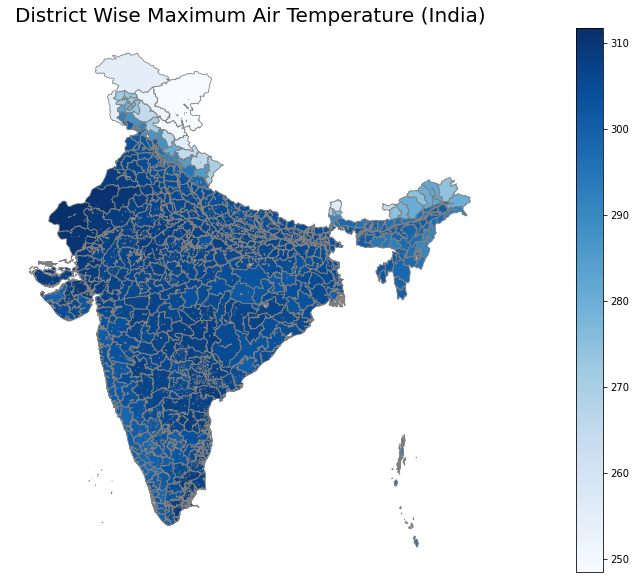

In [13]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('District Wise Maximum Air Temperature (India)', fontsize=20)

sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=merged_India["minimum_2m_air_temperature"].min(), 
                                                              vmax=merged_India["maximum_2m_air_temperature"].max() 
                                                              )) 
sm.set_array([])
fig.colorbar(sm)
merged_India.plot(column='maximum_2m_air_temperature', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5', figsize = (5,15))
plt.show()

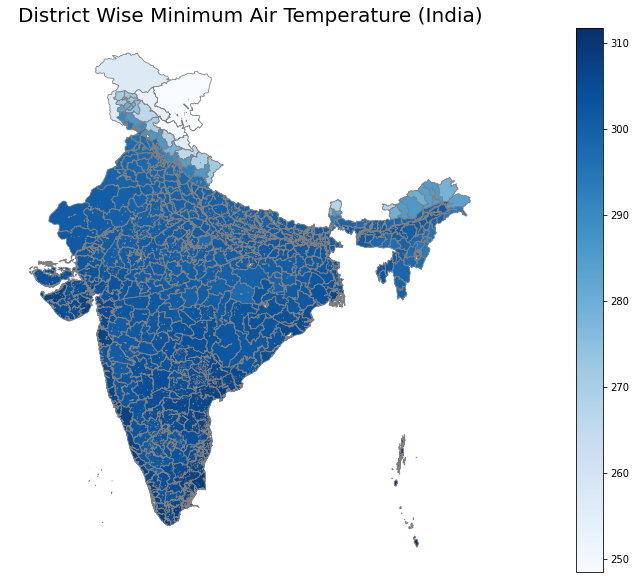

In [14]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('District Wise Minimum Air Temperature (India)', fontsize=20)

sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=merged_India["minimum_2m_air_temperature"].min(), 
                                                              vmax=merged_India["maximum_2m_air_temperature"].max() 
                                                              )) 
sm.set_array([])
fig.colorbar(sm)
merged_India.plot(column='minimum_2m_air_temperature', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5', figsize = (5,15))
plt.show()

# Visualization (Bangalore)

In [15]:
df_blr = pd.read_csv('/content/drive/My Drive/GEE/Temp_Analysis_Bangalore_1980_2020.csv')

In [16]:
df_blr.head()

,DISPLAY_NA,MOVEMENT_I,WARD_NAME,WARD_NO,date,maximum_2m_air_temperature,minimum_2m_air_temperature
0,"Raghva Niwas, 38th Cross Road, 4th T Block Eas...",162,Pattabhiram Nagar,168,1980-01-01T00:00:00,305.679810,288.141510
1,"100 16 A Main Road, Canara Bank Colony, Jayana...",163,Byrasandra,169,1980-01-01T00:00:00,305.679810,288.141510
2,"725-44, TMC Layout, 1st Phase, JP Nagar, Benga...",164,Shakambari Nagar,179,1980-01-01T00:00:00,305.679810,288.141510
3,"State Highway 35, Devasthanagalu, Gunjur Villa...",165,Varthuru,149,1980-01-01T00:00:00,305.614028,288.051396
4,"Bellandur - Doddakannelli Road, Adarsh Palm Re...",166,Bellanduru,150,1980-01-01T00:00:00,305.679810,288.141510


In [17]:
df_blr.describe()

,MOVEMENT_I,WARD_NO,maximum_2m_air_temperature,minimum_2m_air_temperature
count,31878.000000,31878.000000,31878.000000,31878.000000
mean,99.500000,99.500000,304.154152,290.314776
std,57.157844,57.157844,2.256705,2.465322
min,1.000000,1.000000,299.779180,285.618077
25%,50.000000,50.000000,302.053467,287.973785
50%,99.500000,99.500000,304.150696,290.712585
75%,149.000000,149.000000,306.117432,292.634186
max,198.000000,198.000000,309.331268,294.828505


In [18]:
df_blr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31878 entries, 0 to 31877
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DISPLAY_NA                  31878 non-null  object 
 1   MOVEMENT_I                  31878 non-null  int64  
 2   WARD_NAME                   31878 non-null  object 
 3   WARD_NO                     31878 non-null  int64  
 4   date                        31878 non-null  object 
 5   maximum_2m_air_temperature  31878 non-null  float64
 6   minimum_2m_air_temperature  31878 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


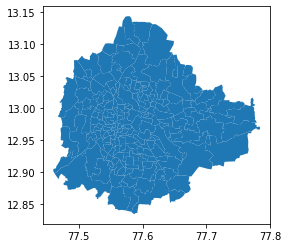

In [19]:
# plotting map of Bangalore
path = r'/content/drive/MyDrive/GEE/bangalore_shapefile/bangalore_wards.dbf'
map_blr = gpd.read_file(path)
map_blr.plot()
plt.show()

In [20]:
blr_districts = df_blr.groupby('WARD_NAME').mean()
blr_districts.head()

,MOVEMENT_I,WARD_NO,maximum_2m_air_temperature,minimum_2m_air_temperature
WARD_NAME,,,,
A Narayanapura,8,56,304.170023,290.360707
Adugodi,155,147,304.172950,290.366638
Agaram,91,114,304.172950,290.366638
Agrahara Dasarahalli,112,105,304.172950,290.366638
Anjanapura,185,196,304.172950,290.366638


In [21]:
merged_blr = map_blr.merge(blr_districts, left_on = 'WARD_NAME', right_index = True)
merged_blr.head()

,WARD_NO_x,WARD_NAME,MOVEMENT_I_x,DISPLAY_NA,geometry,MOVEMENT_I_y,WARD_NO_y,maximum_2m_air_temperature,minimum_2m_air_temperature
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru","POLYGON ((77.59229 13.09720, 77.59094 13.09842...",1,2,304.085638,290.189723
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...","POLYGON ((77.56862 13.12705, 77.57064 13.12654...",2,3,304.085638,290.189723
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...","POLYGON ((77.59094 13.09842, 77.59229 13.09720...",3,4,304.085638,290.189723
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...","POLYGON ((77.67683 13.01147, 77.67695 13.01149...",4,51,304.089227,290.196995
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...","POLYGON ((77.72899 13.02061, 77.72994 13.01995...",5,53,304.086078,290.190615


## Plotting Map of Bangalore with Min/Max Air Temperature

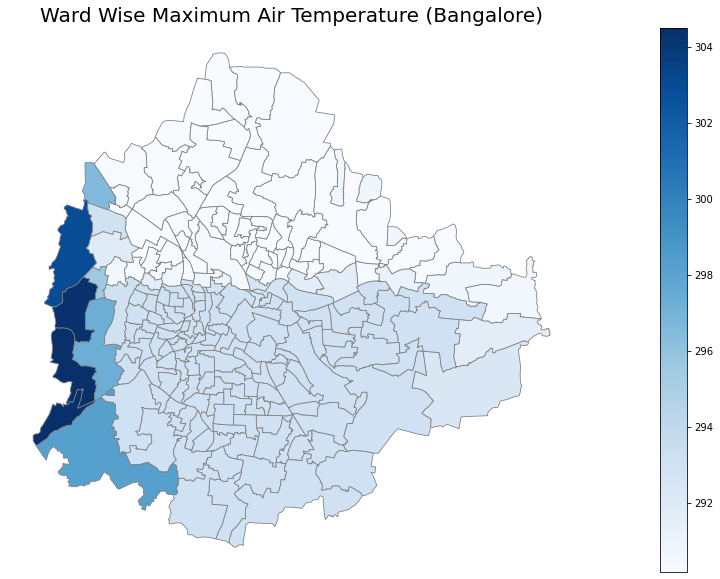

In [22]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Ward Wise Maximum Air Temperature (Bangalore)', fontsize=20)

sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=merged_blr["minimum_2m_air_temperature"].min(), 
                                                              vmax=merged_blr["maximum_2m_air_temperature"].max() 
                                                              )) 
sm.set_array([])
fig.colorbar(sm)
merged_blr.plot(column='maximum_2m_air_temperature', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5', figsize = (5,15))
plt.show()

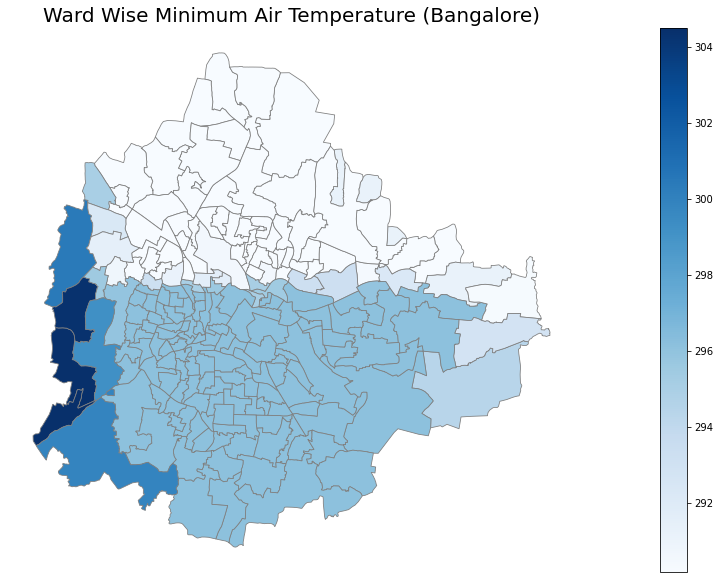

In [23]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Ward Wise Minimum Air Temperature (Bangalore)', fontsize=20)

sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=merged_blr["minimum_2m_air_temperature"].min(), 
                                                              vmax=merged_blr["maximum_2m_air_temperature"].max() 
                                                              )) 
sm.set_array([])
fig.colorbar(sm)
merged_blr.plot(column='minimum_2m_air_temperature', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.5', figsize = (5,15))
plt.show()